## KNN(2) - 와인등급 예측하기

### 1. 패키지 설치 및 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv'
data = pd.read_csv(file_url)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [3]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [4]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,176.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.989091,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.362370,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.804431,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.126153,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.355000,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.260000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.672500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.450000,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.750000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


> 1. 변수마다 값의 범위가 상당히 다르다 -> Scaling 필요 <br>
> 2. 이상치의 처리 : color_intensity의 경우와 같이 75%에서 max값의 gap이 크다. <br>
> 3. 결측치의 처리  -> 소수이므로, null값은 삭제

In [5]:
# 종속변수 class 분포 확인 
data['class'].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

### 2. 전처리(1) - 결측치 처리

In [6]:
data.dropna(inplace=True)

> 7row 삭제

In [7]:
data.dropna().isna().mean()

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
class                           0.0
dtype: float64

> 결측치 삭제 확인함.

## [궁금증] 결측치 처리 방법
통상적으로 50% 이상이면 drop()을 고려할만하고, 
70~80%이상이면 가급적 drop()을 적용하는 것이 좋다.

하지만 경우에 따라서는 90%가 결측치라고 해도, 해당 변수가 프로세스에서 매우 중요한 역할을 할 거라 생각된다면 어떻게든 활용 방법을 찾는 것이 좋다.

### 3. 전처리(2)-스케일링

|구분|결과물의 특징|
|--|--|
|StandardScaler|데이터에 아웃라이어가 존재할때 아웃라이어의 영향을 받는다. 평균0, 분산1이 되게끔 분포시키기 때문에 데이터의 기존 분포 형태가 사라지고 정규분포를 따르는 결과물을 가져온다.|
|RoburstScaler|데이터에 아웃라이어가 존재할때 아웃라이어의 영향을 받지 않는다. 변환된 데이터의 범위는 표준화 스케일링이나 최소-최대 스케일링보다 넓게 나타난다.|
|MinMaxScaler|데이터에 아웃라이어가 존재할때 아웃라이어의 영향을 받는다. 위의 두 스케일러와 비교했을 때, 데이터의 기존 분포를 가장 있는 그대로 담아내며 스케일만 변화시킨다. 데이터의 범위는 0~1로 나타낸다.|

In [8]:
# 학습 데이터 셋 분리 후 스케일링 진행
from sklearn.model_selection import train_test_split
x = data.drop('class', axis=1)
y = data[['class']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [17]:
x.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [9]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((136, 13), (35, 13), (136, 1), (35, 1))

In [18]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler 
minmax = MinMaxScaler()
minmax.fit(x_train)
x_train_scaled = minmax.transform(x_train)
x_test_scaled = minmax.transform(x_test)

> fit : 은 알고리즘을 학습시키고 저장해놓는 것을 말한다. <br>
> minmax.fit_transform(x_train) / minmax.fit_transform(x_test) 이렇게 해버리면, x_train, x_test 별 minmax값에 따라 scaling을 하게 된다 => x를 한꺼번에 넣고 scaling을 진행시켰어야 한다.

### 3. KNN 모델링

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() #default (n_neighbors=5, metric='minkowski',p=2, weights='uniform')
knn.fit(x_train_scaled, y_train)
pred = knn.predict(x_test_scaled)
pred

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 0, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1], dtype=int64)

In [12]:
y_test

,class
42,0
124,1
72,1
169,2
132,2
155,2
9,0
28,0
34,0
13,0


### 4. 모델 평가

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred) 

0.9714285714285714

> accuracy_score는 항상 일정하지 x -> 의심을 해야한다.. <br>
> 그러면 정확도는 어떻게 확인할 수 있을까? => K-fold 교차검증을 통해 accuracy의 평균값을 구해보자!

### 5. 하이퍼파라미터 설정 후 다시 모델링

In [21]:
# k의 범위를 1~20으로 설정
scores = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='minkowski')
    knn.fit(x_train_scaled, y_train)
    pred = knn.predict(x_test_scaled)
    scores.append(accuracy_score(y_test, pred))

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classif

<Axes: >

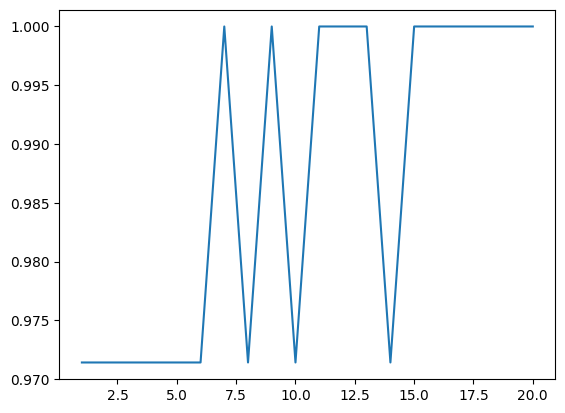

In [22]:
# scores 시각화
sb.lineplot(x=range(1,21), y=scores)